In [23]:
## Constantes
TIPO_1 = 1
TIPO_2 = 2
P_TIPO_1 = 0.35
P_TIPO_2 = 1 - P_TIPO_1
dt1 = function(t) { return(dnorm(t, 1.9, sqrt(0.19))) }
dt2 = function(t) { return(dnorm(t, 2.2, sqrt(0.09))) }

In [20]:
## Ej 7
class.optim.variedad = function(nnicotina) {
    p_tipo_1 = dnorm(nnicotina, 1.9, sqrt(0.16)) * P_TIPO_1
    p_tipo_2 = dnorm(nnicotina, 2.2, sqrt(0.09)) * P_TIPO_2
    if (p_tipo_1 > p_tipo_2) {
        return(TIPO_1)
    } else {
        return(TIPO_2)
    }
}

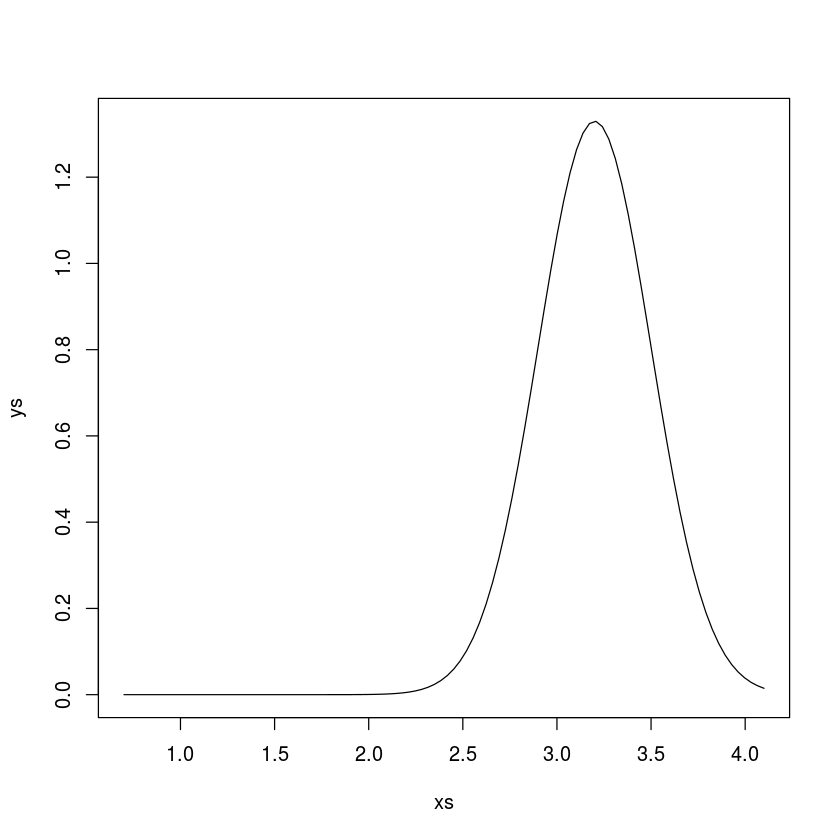

In [22]:
## Ej 8
xs = seq(0.7, 4.1, length=100)
ys = dnorm(xs, 3.2, sqrt(0.09))
plot(xs, ys, type='l')

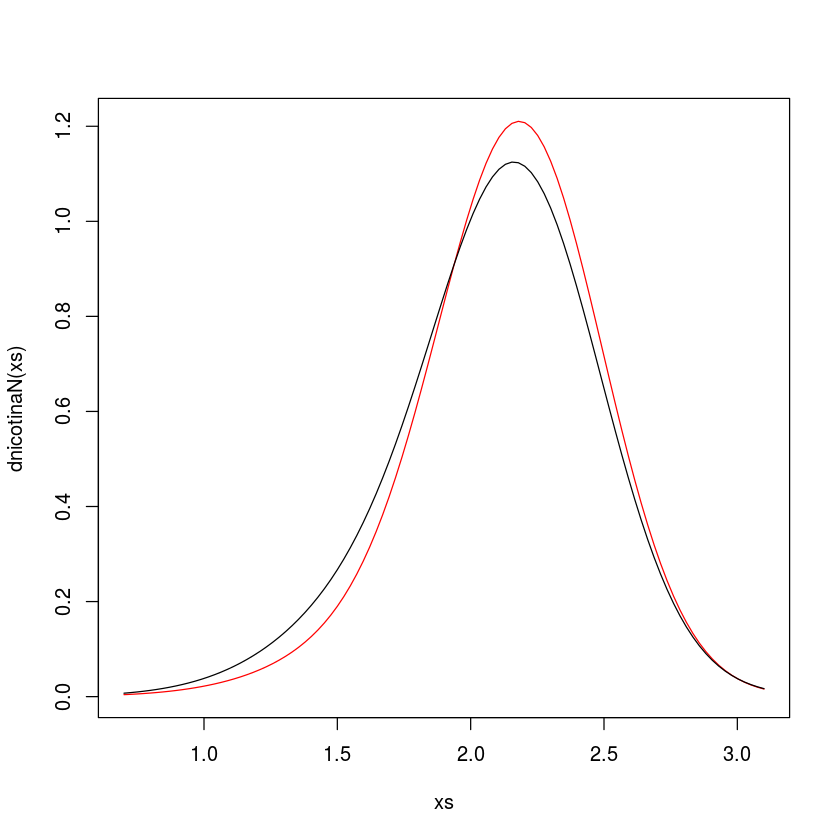

In [80]:
## Ej 10
gen <- function(pp, dd) {
    function(t) {
            acum = 0
            for (i in 1:length(pp)) {
                acum = acum + pp[i] * dd[[i]](t)
            }
            return(acum)
        }
}
dnicotinaX <- gen(c(0.35, 0.65), c(dt1, dt2))
dnicotinaN <- gen(c(0.2, 0.8), c(dt1, dt2))


xs = seq(0.7, 3.1, length=100)
plot(xs, dnicotinaN(xs), type='l', col='red')
lines(xs, dnicotinaX(xs), type='l', col='black')

ERROR: Error in as.graphicsAnnot(legend): argument "legend" is missing, with no default


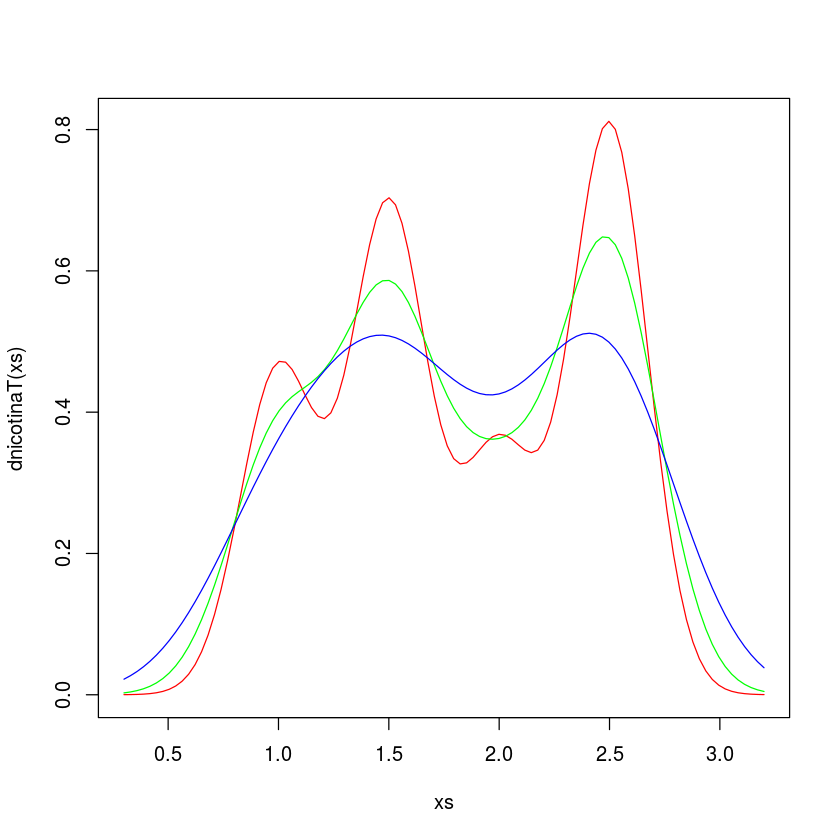

In [104]:
## Ej 11
genD = function(m, sd) { return(function(t) { dnorm(t, m, sqrt(sd)) }) }
sdd = c(0.03, 0.05, 0.1)
xs = seq(0.3, 3.2, length=100)
cols = c('red', 'green', 'blue', 'purple')
for (i in 1:length(sdd)) {
    sd = sdd[i]
    color = cols[i]
    dnicotinaT = gen(c(0.2, 0.3, 0.15, 0.35), c(genD(1, sd), genD(1.5, sd), genD(2, sd), genD(2.5, sd)))
    if (i == 1) {
        plot(xs, dnicotinaT(xs), type='l', col=color)
    } else {
        lines(xs, dnicotinaT(xs), type='l', col=color)
    }
}
legend('topleft', sdd)

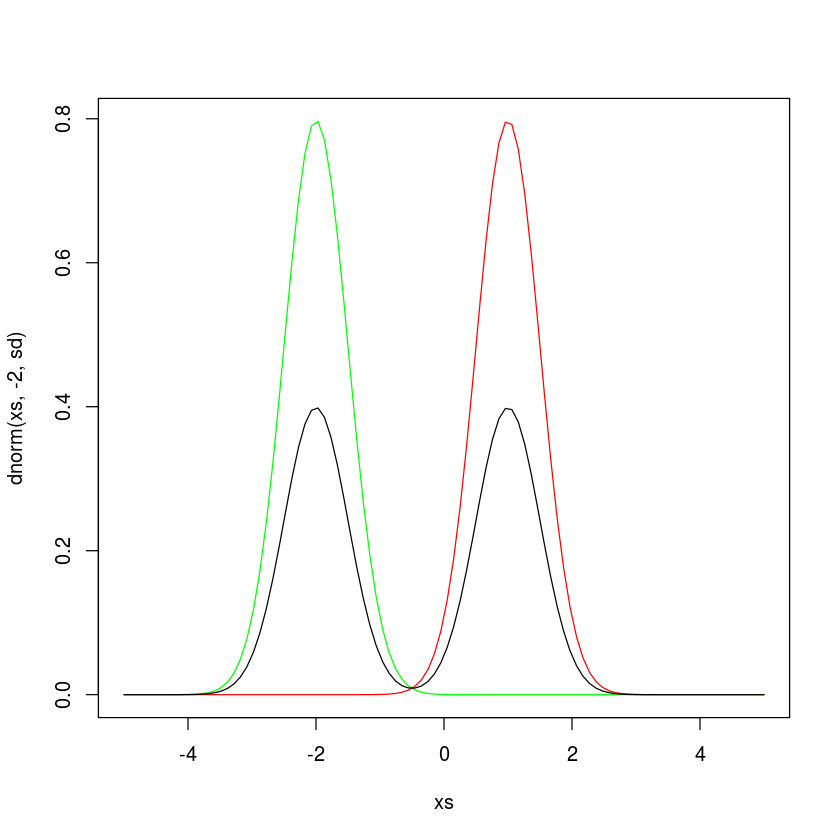

In [101]:
xs = seq(-5, 5, length=100)
sd = 0.5
plot(xs, dnorm(xs, -2, sd), type='l', col='green')
lines(xs, dnorm(xs, 1, sd), type='l', col='red')
lines(xs, (dnorm(xs, -2, sd) + dnorm(xs, 1, sd)) / 2, type='l', col='black')

In [105]:
ndata <- read.table('datos_nicotina.txt', header=T)
dist.names <- c('N', 'T', 'W', 'X')
dist.means <- 